In [1]:
%load_ext autoreload
%autoreload 2

In [203]:
import mudata
import anndata
import scanpy as sc
import pandas as pd
import numpy as np

from typing import List, Dict, Union

In [214]:
def sample_dataset():
    adata = sc.datasets.pbmc3k_processed()
    # adata2 = sc.datasets.blobs(n_observations=10000, n_centers=12, n_variables=500)
    ## Make DataFrame assigning cells to views
    assign_dict = {
        'myeloid':['CD14+ Monocytes', 'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes'],
        'lymphoid':['NK cells', "CD8 T cells", 'CD4 T cells', 'B cells'],
        'NKT cells':['NK cells', "CD8 T cells", 'CD4 T cells'],
        'T cells':["CD8 T cells", 'CD4 T cells'],
        'B cells':['B cells']
    }
    annotation_col = 'louvain'

    assign_tab = np.vstack([np.where(adata.obs[annotation_col].isin(assign_dict[k]), 1, 0) for k in assign_dict.keys()]).T
    assign_tab = pd.DataFrame(assign_tab, columns = assign_dict.keys(), index = adata.obs_names)

    ## Make dictionary of parent-child structure of views
    view_hierarchy = {
        'myeloid':None,
        'lymphoid':{
            "NKT cells":{
                'T cells':None
            },
            "B cells":None}
    }
    return(adata)


# ## small tests
# broken_assign_tab = assign_tab.copy()
# broken_assign_tab['T cells'] = broken_assign_tab['T cells'].sample(frac=1).values
# _clean_view_assingment(broken_assign_tab, view_hierarchy)

# assign_tab['ciaone'] = broken_assign_tab['T cells'].sample(frac=1).values
# _clean_view_assingment(assign_tab, view_hierarchy)

In [244]:
import multi_view_atlas as mva

In [236]:
adata = mva.utils.sample_dataset()
mvatlas = mva.tl.MultiViewAtlas(adata)
mvatlas
    # [np.where(np.array(s.split('.')) == v)[0][0]  if v in s]

/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


MultiViewAtlas object with view hierarchy:
	lymphoid:
	  B cells: null
	  NKT cells:
	    T cells: null
	myeloid: null
	
MuData object with n_obs × n_vars = 2638 × 1838
  obsm:	'view_assign'
  6 modalities
    full:	2638 x 1838
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      var:	'n_cells'
      uns:	'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'view_hierarchy'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    myeloid:	682 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    lymphoid:	1956 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr', 'view_assign'
    NKT cells:	1614 x 0
      obs:	'n_genes', 'percent_mito', 'n_counts', 'louvain'
      obsm:	'X_pca', 'X_tsne', 'X_umap', 'X_draw_

In [237]:
mvatlas.views

['myeloid', 'lymphoid', 'NKT cells', 'T cells', 'B cells']

In [ ]:
## Re-compute embedding on each view
for v in mvatlas.views:
    vadata = mvatlas[v]
    sc.pp.pca(vadata)
    sc.pp.neighbors(vadata, n_neighbors=10)
    sc.tl.umap(vadata)
    mvatlas.mdata[v].obsm = vadata.obsm.copy()


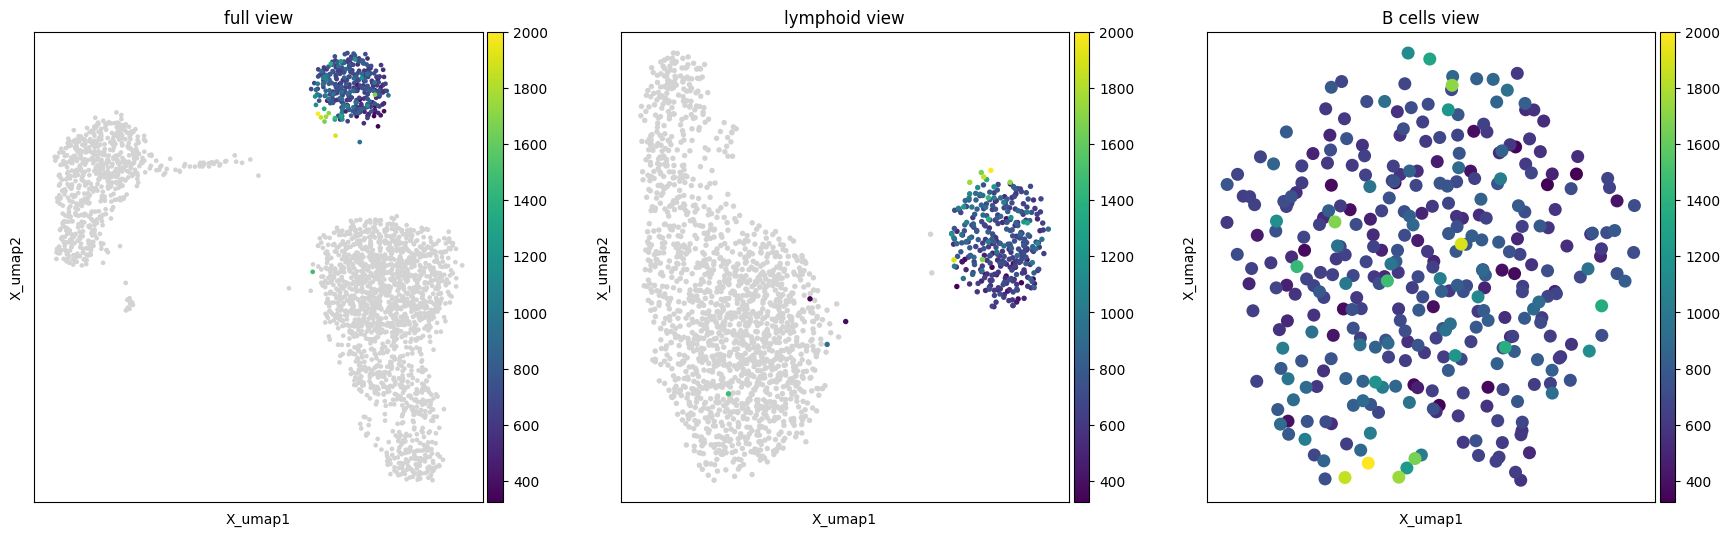

/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/patho-signatures-2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


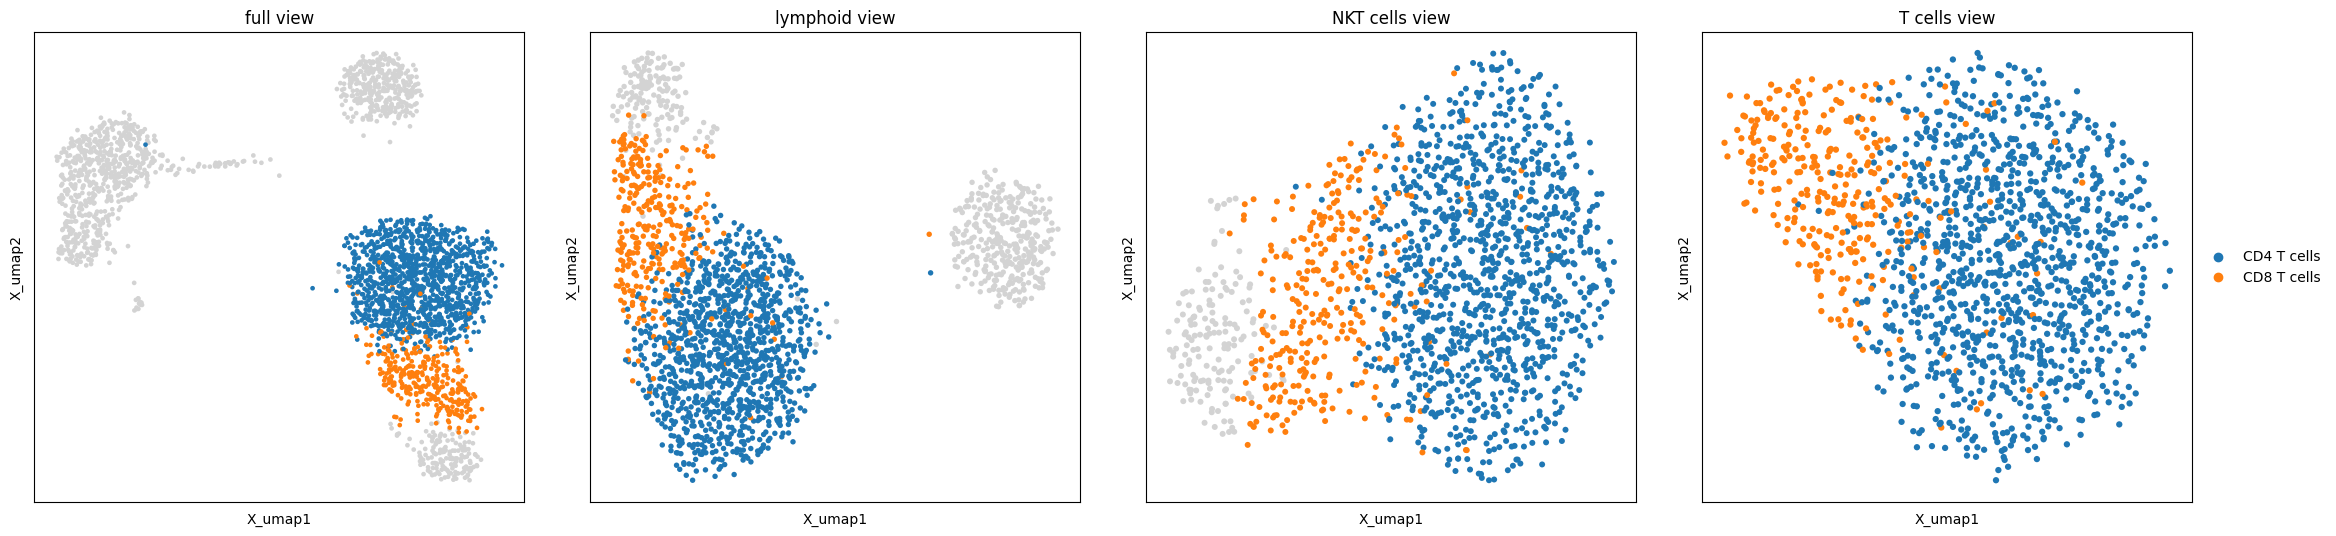

In [260]:
## Visualize nested embeddings
mva.pl.multiview_embedding(mvatlas, 'B cells', color= 'n_genes', legend_loc='right margin',fig_height=6)
mva.pl.multiview_embedding(mvatlas, 'T cells', color= 'louvain', legend_loc='right margin',fig_height=6)


